In [1]:
import pandas as pd
import numpy
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


# Importation Modele

In [ ]:
#Creation RandomForest
myForest=RandomForestClassifier()

In [ ]:
#Sauvegarde du random
filename = 'randomforest.sav'
pickle.dump(myForest, open(filename, 'wb'))


In [ ]:
#Chargement
m=pickle.load(open("randomforest.sav","rb"))

# Importation Base

In [2]:
test=pd.read_csv("../../../Database/Kaggle/Train_rev1.csv")
#On supprime les elements suivants pour l'instant
test=test.drop(columns=["SalaryRaw","Id","Title",'FullDescription',"LocationRaw"])
test.head()

,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName
0,Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk
1,Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk
2,Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk
3,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,27500,cv-library.co.uk
4,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk


## Quelques Traitement pour rendre binaire la base

In [ ]:
#On veut pas perdre d'information quand l'employeur ne spécifie pas le temps de contract
test["ContractTime"].fillna("Nospecif", inplace = True) 
contracttime=pd.get_dummies(test["ContractTime"])
test=pd.concat((test,contracttime),axis=1)

In [ ]:
#binairisation de Category
Category=pd.get_dummies(test["Category"])
test=pd.concat((test,Category),axis=1)
#binairisation de ContractType 
test["ContractType"].fillna("NospecifContractType", inplace = True) 
ContractType=pd.get_dummies(test["ContractType"])
test=pd.concat((test,ContractType),axis=1)



In [ ]:
#Location
#Très couteux attention ne pas le faire
Location=pd.get_dummies(test["LocationNormalized"])
test=pd.concat((test,Location),axis=1)

In [ ]:
#Suppression des colonnes
test=test.drop(columns=["ContractType","ContractTime","Company",'LocationNormalized',"ContractType","Category","SourceName"])



In [ ]:
#Essaie avec un réseaux de neurones

In [ ]:

clf_10 = MLPClassifier(solver='sgd', alpha=0, hidden_layer_sizes=(50), random_state=1, activation='relu', max_iter=100, learning_rate_init=0.01)


In [ ]:
X_train=test.drop(columns=["SalaryNormalized"])
Y_train=test["SalaryNormalized"]

In [ ]:
Sql traitement: bcp de requetes quel forme
PowerBI: Datanalyse
Interagir avec pandas numpy
Selenium 
python


In [ ]:

clf_10.fit(X_train.loc[:1000],Y_train.loc[:1000])


In [ ]:
clf_10.score(X_train.loc[:1000],Y_train.loc[:1000])

In [ ]:
clf_10.predict(X_train.loc[50:60])

In [ ]:
Y_train.loc[50:60]

In [ ]:
liste=['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category',
        'SourceName']

In [ ]:
liste=pd.read_csv("../../../Database/Kaggle/Test_rev1.csv")

In [ ]:
test=test.dropna()
y_test=test["SalaryNormalized"]
x_test=test[liste.columns]

In [ ]:
liste.columns

In [ ]:
m.score(x_test,y_test)

In [ ]:
test

# nuage de point pour fais beau et pour faire sortir une quelquoncque correlation

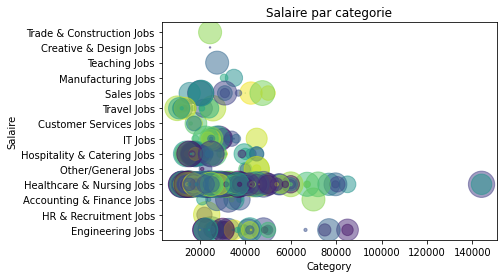

In [3]:
notes_moyennes=test["Category"].loc[:1000].to_numpy()
votans=test["SalaryNormalized"].loc[:1000].to_numpy()

""" ici je visualise la note moyenne des films en fonction du nombres de votants
"""

colors=np.random.rand(len(votans))
area= np.pi * (15 * np.random.rand(len(votans)))**2
#En abcisse on veut les votans , et en ordonnée les notes
plt.scatter(votans,notes_moyennes,s=area, c=colors, alpha=0.5)

plt.title('Salaire par categorie')
plt.xlabel('Category')
plt.ylabel('Salaire')
plt.show()

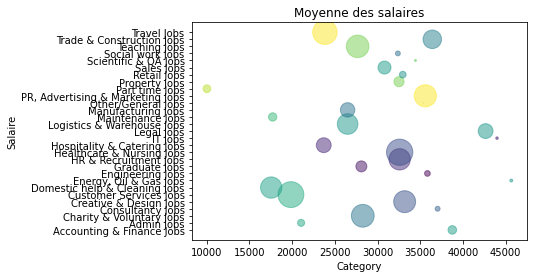

In [4]:
notes_moyennes=test["Category"].loc[:1000].to_numpy()
votans=test["SalaryNormalized"].loc[:1000].to_numpy()

notes_moyennes=test.groupby("Category").mean().reset_index()["Category"]
votans=test.groupby("Category").mean().reset_index()["SalaryNormalized"]
""" ici je visualise la note moyenne des films en fonction du nombres de votants
"""

colors=np.random.rand(len(votans))
area= np.pi * (15 * np.random.rand(len(votans)))**2
#En abcisse on veut les votans , et en ordonnée les notes
plt.scatter(votans,notes_moyennes,s=area, c=colors, alpha=0.5)

plt.title('Moyenne des salaires')
plt.xlabel('Category')
plt.ylabel('Salaire')
plt.show()

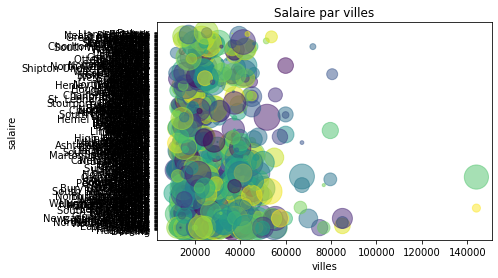

In [6]:
notes_moyennes=test["LocationNormalized"].loc[:1000].to_numpy()
votans=test["SalaryNormalized"].loc[:1000].to_numpy()

""" ici je visualise la note moyenne des films en fonction du nombres de votants
"""

colors=np.random.rand(len(votans))
area= np.pi * (15 * np.random.rand(len(votans)))**2
#En abcisse on veut les votans , et en ordonnée les notes
plt.scatter(votans,notes_moyennes,s=area, c=colors, alpha=0.5)

plt.title('Salaire par villes')
plt.xlabel('villes')
plt.ylabel('salaire')
plt.show()

In [ ]:
#Correlation par category

In [ ]:
corr=test.groupby("Category").mean().reset_index().corr(method ='kendall')
corr

In [ ]:
corr.loc["SalaryNormalized"]>0.4

In [ ]:
corr.loc["SalaryNormalized"]<-0.3

In [ ]:
corr.loc["SalaryNormalized"]

In [ ]:
#Correlation par Location

In [ ]:
corr=test.groupby("LocationNormalized").mean().reset_index().corr(method ='kendall')
corr

In [ ]:
corr.loc["SalaryNormalized"]>0.4

In [ ]:
corr.loc["SalaryNormalized"]<-0.3

# Regression Lineaire

In [ ]:
test

In [ ]:
X=test.drop(columns=["SalaryNormalized"])
Y=test["SalaryNormalized"]

In [ ]:
X_train ,  X_test ,  y_train ,  y_test  =  train_test_split ( X ,  Y ,  test_size = 0.33 ,  random_state = 42 )
reg = LinearRegression().fit(X_train, y_train)#fit entraine et remplace X_bis par X_train et y par y_train
reg.score(X_train, y_train)
reg.coef_

reg.intercept_ 
reg.predict(X_test).mean()
# predict X_test a comparer avec y test
from sklearn.metrics import r2_score
r2_score(y_test,reg.predict(X_test))

In [ ]:
tr=[]
pr=[]
for i in range(100):
    ind=random.choice(range(len(X_test)))
    print(reg.predict(X_test.iloc[ind:ind+1]),y_test.iloc[ind])
    tr.append(y_test.iloc[ind])
    pr.append(reg.predict(X_test.iloc[ind:ind+1])[0])
np.mean(pr),np.mean(tr)

In [ ]:
from sklearn.svm import SVR
reg = SVR(C=100)
reg.fit(X_train, y_train)#fit entraine et remplace X_bis par X_train et y par y_train
reg.score(X_train, y_train)
reg.coef_

reg.intercept_ 
reg.predict(X_test).mean()
# predict X_test a comparer avec y test
from sklearn.metrics import r2_score
r2_score(y_test,reg.predict(X_test))

In [ ]:
reg.score(X_train, y_train)

# Random Forest regressor

In [ ]:
liste=pd.read_csv("../../../Database/Kaggle/Test_rev1.csv")
test=test.dropna()
y_test=test["SalaryNormalized"]
x_test=test[liste.columns]
m.score(x_test,y_test)


In [ ]:
tr=[]
pr=[]
for i in range(100):
    ind=random.choice(range(len(x_test)))
    print(m.predict(x_test.iloc[ind:ind+1]),y_test.iloc[ind])
    tr.append(y_test.iloc[ind])
    pr.append(m.predict(x_test.iloc[ind:ind+1])[0])
np.mean(pr),np.mean(tr)

In [ ]:
X=test.drop(columns=["SalaryNormalized"])
Y=test["SalaryNormalized"]

In [ ]:
myForestBinaryData=RandomForestRegressor()

In [ ]:
X_train ,  X_test ,  y_train ,  y_test  =  train_test_split ( X ,  Y ,  test_size = 0.33 ,  random_state = 42 )


In [ ]:
myForestBinaryData.fit(X_train, y_train)

In [ ]:
myForestBinaryData.score(X_train,y_train)

In [ ]:
myForestBinaryData.score(X_test,y_test)

In [ ]:
tr=[]
pr=[]
for i in range(100):
    ind=random.choice(range(len(X_test)))
    print(myForestBinaryData.predict(X_test.iloc[ind:ind+1]),y_test.iloc[ind])
    tr.append(y_test.iloc[ind])
    pr.append(myForestBinaryData.predict(X_test.iloc[ind:ind+1])[0])
np.mean(pr),np.mean(tr)